# Image

In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd

In [13]:
folder_path = "./Data/test/test/files/"
image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png', '.jpeg','.pdf','.tiff'))]
print(len(image_paths))

41


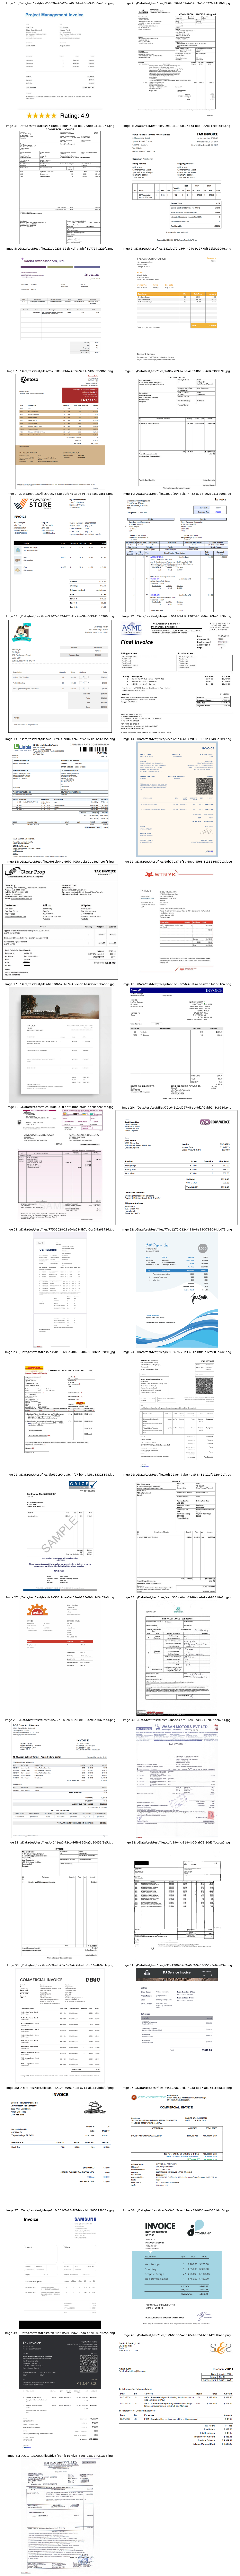

In [14]:
num_rows = (len(image_paths) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))

for i, filepath in enumerate(image_paths):
    image = cv2.imread(filepath)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]
    ax.imshow(image_rgb)
    ax.axis('off')
    ax.set_title(f'Imge {i+1}: {filepath}', fontsize=10, pad=5)

if len(image_paths) % 2 != 0:
    axes[num_rows - 1, 1].axis('off')

plt.tight_layout()
plt.show()

### Functions

We defined several functions for processing and extracting information from handwritten images using a vision model. Key functionalities include creating a payload for the model, calculating Levenshtein similarity, finding bounding box coordinates for target items or tables in the model's response, post-processing the response to a more usable format, and extracting required bounding box coordinates.

### Process

We initialized an OCR model using the PaddleOCR library. This is for Optical Character Recognition tasks.We initialized an OpenAI client for natural language processing tasks using the provided API key.We sets a folder path, generates a list of image paths within that folder based on specific file extensions, prints the count of these paths, and defines a function to encode images to base64.

Further, we defined HTTP headers with a content type and authorization token, and initializes a prompt containing instructions for extracting specific information from an invoice image. The instructions include details on expected patterns, data formatting, and the desired response structure in a dictionary format. The provided prompt is intended for use in a natural language processing (NLP) task, where the model is expected to generate a response based on the given instructions.

Here it a list of image paths, sending each image to the OpenAI GPT-4 Vision API for completion using a predefined payload. The responses from the API are stored in a list (responses). The images are also displayed using Matplotlib during the process, and the total number of responses is printed at the end.It also concatenates elements of the responses list into a single string, with each element separated by a space.

The code applies post-processing to the concatenated string (array_string), resulting in a list of processed responses (processed_responses). It then retrieves the elements from the processed responses.

It processes a subset of image paths in the image_paths list. For each image, it performs OCR using the PaddleOCR library (ocr.ocr), finds bounding box coordinates for invoice number, issue date, total, and table elements in the OCR result, and updates the corresponding fields in the processed_responses list. The final processed response for the images is then retrieved.